In [1]:
import numpy
import matplotlib.pyplot as plt
import scipy.optimize
import sympy
sympy.init_printing()

In [2]:
def G(s):
    return numpy.array([[4.05 * numpy.exp(-27*s) / (50*s + 1),
                         1.77 * numpy.exp(-28*s) / (60*s + 1),
                         5.88 * numpy.exp(-27*s) / (50*s + 1)],
                        [5.39 * numpy.exp(-18*s) / (50*s + 1),
                         5.72 * numpy.exp(-14*s) / (60*s + 1),
                         6.90 * numpy.exp(-15*s) / (40*s + 1)],
                        [4.38 * numpy.exp(-20*s) / (33*s + 1),
                         4.42 * numpy.exp(-22*s) / (44*s + 1),
                         7.20 * numpy.exp(-0*s) / (19*s + 1)]])

## PF

In [3]:
def PF_gen(Gsys):
    def PF(s):
        G = Gsys(s)
        G_diag = numpy.diag(numpy.diag(G))
        return numpy.linalg.inv(G_diag) @ G
    return PF

PF = PF_gen(G)

In [4]:
def fperron(G, ws):
    jws = 1j*ws
    PF = PF_gen(G)
    PFh = lambda s: PF(s).conj().T
    eigvals = numpy.array([numpy.linalg.eigvals(PFh(jw)).conj() for jw in jws])
    eigvecs = numpy.array([numpy.linalg.eig(PFh(jw))[1] for jw in jws])
    idxs = numpy.argmax(numpy.abs(eigvals), axis=1)
    
    pf_eigvals = numpy.array([ev[indx] for ev, indx in zip(eigvals, idxs)])
    pf_eigvecs_unadj = numpy.array([ev[:, indx] for ev, indx in zip(eigvecs, idxs)])
    

    pf_eigvecs = pf_eigvecs_unadj[:, 0][:, numpy.newaxis]/ pf_eigvecs_unadj
    
    return pf_eigvals, pf_eigvecs

def dBify(v):
    return 20*numpy.log10(v)

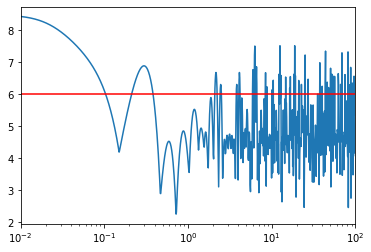

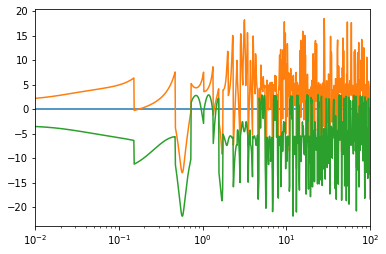

In [5]:
ws = numpy.logspace(-2, 2, 1000)

evals, evecs = fperron(G, ws)


plt.semilogx(ws, dBify(numpy.abs(evals)))
plt.axhline(6, color='r')
plt.xlim(1e-2, 1e2)
plt.savefig("fperron_eval.pdf")
plt.show()

plt.semilogx(ws, dBify(numpy.abs(evecs)))
plt.xlim(1e-2, 1e2)
plt.savefig("fperron_evec.pdf")
plt.show()